# Overview

Are there any predictable patterns that determine churn for the Telecom Company? This analysis seeks to classify customer who leave the service (churn) and determine which levers can be pulled to increase customer retention.

# Business Problem


Customers who leave Telecom's service quickly result in money lost on the customer acquisition and other related costs. This analysis will classify customers who churn and interpret what leads to their departure.

# Data Preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
#load data
import pandas as pd
df = pd.read_csv('Telecom_data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
#inspect churn column
df['churn'].unique()

array([False,  True])

In [5]:
#look at class imbalance
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

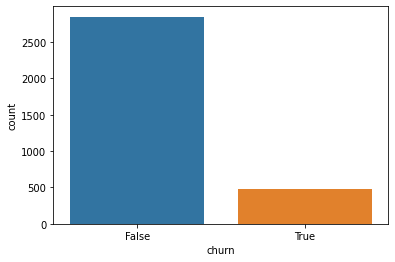

In [6]:
#visualize class imbalance
sns.countplot(x='churn', data=df)
plt.show()

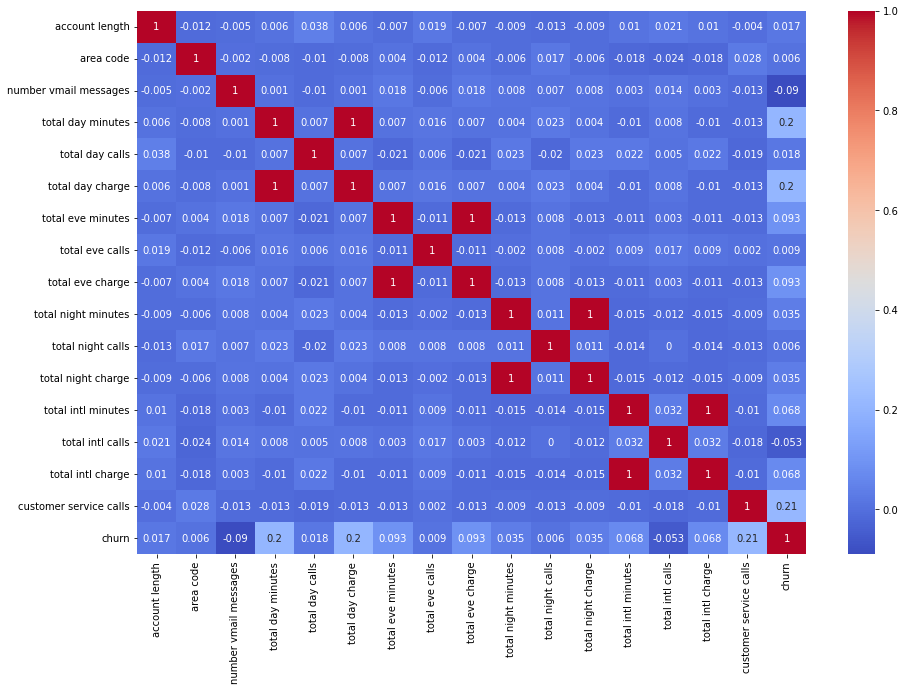

In [7]:
cor = df.corr() #visualize correlations
plt.figure(figsize=(15,10))
sns.heatmap(cor.round(3),annot=True,cmap='coolwarm')
plt.show()

Significant class imbalance; manipulation needed for modeling. Moreover, minutes and amount charged for those minutes are perfectly correlated. Can drop redundant columns.

In [8]:
df1 = df.drop(['phone number'], axis=1) #drop phone number, not relevant

In [9]:
df1.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
df1.isna().sum() #check for N/A

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [11]:
#Change to int
df1['churn'] = df1['churn'].astype(int)
df1.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
ohe = OneHotEncoder() #code categorical variables as dummy variables

cat = df[['state', 'area code', 'international plan', 'voice mail plan']]
num = df.drop(columns=['state', 'area code', 'international plan', 'voice mail plan'], axis=1)

transformed_cat = pd.DataFrame(ohe.fit_transform(cat).toarray())
transformed_cat.columns = ohe.get_feature_names()

dummy_df = pd.concat([transformed_cat, num], axis=1)
dummy_df.head()

,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,x0_DE,x0_FL,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [14]:
dummy_df.columns

Index(['x0_AK', 'x0_AL', 'x0_AR', 'x0_AZ', 'x0_CA', 'x0_CO', 'x0_CT', 'x0_DC',
       'x0_DE', 'x0_FL', 'x0_GA', 'x0_HI', 'x0_IA', 'x0_ID', 'x0_IL', 'x0_IN',
       'x0_KS', 'x0_KY', 'x0_LA', 'x0_MA', 'x0_MD', 'x0_ME', 'x0_MI', 'x0_MN',
       'x0_MO', 'x0_MS', 'x0_MT', 'x0_NC', 'x0_ND', 'x0_NE', 'x0_NH', 'x0_NJ',
       'x0_NM', 'x0_NV', 'x0_NY', 'x0_OH', 'x0_OK', 'x0_OR', 'x0_PA', 'x0_RI',
       'x0_SC', 'x0_SD', 'x0_TN', 'x0_TX', 'x0_UT', 'x0_VA', 'x0_VT', 'x0_WA',
       'x0_WI', 'x0_WV', 'x0_WY', 'x1_408', 'x1_415', 'x1_510', 'x2_no',
       'x2_yes', 'x3_no', 'x3_yes', 'account length', 'phone number',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [15]:
#rename dummy column for int. plan
dummy_df = dummy_df.rename(columns={'x2_yes': 'Yes_international_plan', 
                                    'x2_no' : 'No_international_plan'})

In [16]:
#drop phone number, not relevant
dummy_df = dummy_df.drop(['phone number'], axis=1)
dummy_df.head()

,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,x0_DE,x0_FL,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [17]:
dummy_df.columns

Index(['x0_AK', 'x0_AL', 'x0_AR', 'x0_AZ', 'x0_CA', 'x0_CO', 'x0_CT', 'x0_DC',
       'x0_DE', 'x0_FL', 'x0_GA', 'x0_HI', 'x0_IA', 'x0_ID', 'x0_IL', 'x0_IN',
       'x0_KS', 'x0_KY', 'x0_LA', 'x0_MA', 'x0_MD', 'x0_ME', 'x0_MI', 'x0_MN',
       'x0_MO', 'x0_MS', 'x0_MT', 'x0_NC', 'x0_ND', 'x0_NE', 'x0_NH', 'x0_NJ',
       'x0_NM', 'x0_NV', 'x0_NY', 'x0_OH', 'x0_OK', 'x0_OR', 'x0_PA', 'x0_RI',
       'x0_SC', 'x0_SD', 'x0_TN', 'x0_TX', 'x0_UT', 'x0_VA', 'x0_VT', 'x0_WA',
       'x0_WI', 'x0_WV', 'x0_WY', 'x1_408', 'x1_415', 'x1_510',
       'No_international_plan', 'Yes_international_plan', 'x3_no', 'x3_yes',
       'account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='ob

# Data Modeling: Baselines

In [18]:
y = dummy_df['churn'] #build baseline model 
X = dummy_df.drop(['churn'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
#pipeline for model
Pipeline_logreg = Pipeline([('ss', StandardScaler()),
                           ('log_reg', LogisticRegression(class_weight='balanced'))])

In [21]:
#fit model
Pipeline_logreg.fit(X_train, y_train)
Pipeline_logreg.score(X_test, y_test)

0.7913669064748201

In [22]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import plot_confusion_matrix

In [23]:
y_hat_test = Pipeline_logreg.predict(X_test)

In [24]:
y_hat_train = Pipeline_logreg.predict(X_train)

In [25]:
#compare test and predictions
cfm = confusion_matrix(y_test, y_hat_test)
print(cfm)

[[560 149]
 [ 25 100]]


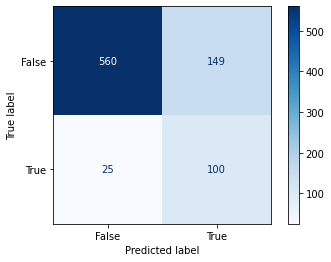

In [26]:
#visualize cfm
plot_confusion_matrix(Pipeline_logreg, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#print scores
print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.36863270777479895
Testing Precision:  0.40160642570281124



Training Recall:  0.7681564245810056
Testing Recall:  0.8



Training Accuracy:  0.7783113245298119
Testing Accuracy:  0.7913669064748201



Training F1-Score:  0.49818840579710144
Testing F1-Score:  0.5347593582887701


For our business case of predicting churn to increase customer retention, the model should prioritize accuracy and recall. False positives are not a problem, while false negatives are. Missing potential churners is a greater concern than misclassifying non-churners. Therefore recall, or the percentage of Churners that our model identified correctly, is our evaluation metric of choice.
<br>
The model has a recall of .808 on the test data.

In [28]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

       False       0.96      0.79      0.87       709
        True       0.40      0.80      0.53       125

    accuracy                           0.79       834
   macro avg       0.68      0.79      0.70       834
weighted avg       0.87      0.79      0.82       834



In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [30]:
#build decision forest pipeline
Pipeline_dt = Pipeline([('ss', StandardScaler()),
                      ('dt', RandomForestClassifier(random_state=123, class_weight='balanced'))])

In [31]:
#fit model
Pipeline_dt.fit(X_train, y_train)
Pipeline_dt.score(X_test, y_test)

0.9304556354916067

In [32]:
yhatTe = Pipeline_dt.predict(X_test)
yhatTr = Pipeline_dt.predict(X_train)

In [33]:
#print score metrics
print('Training Precision: ', precision_score(y_train, yhatTr))
print('Testing Precision: ', precision_score(y_test, yhatTe))
print('\n\n')

print('Training Recall: ', recall_score(y_train, yhatTr))
print('Testing Recall: ', recall_score(y_test, yhatTe))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, yhatTr))
print('Testing Accuracy: ', accuracy_score(y_test, yhatTe))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, yhatTr))
print('Testing F1-Score: ', f1_score(y_test, yhatTe))

Training Precision:  1.0
Testing Precision:  0.971830985915493



Training Recall:  1.0
Testing Recall:  0.552



Training Accuracy:  1.0
Testing Accuracy:  0.9304556354916067



Training F1-Score:  1.0
Testing F1-Score:  0.7040816326530612


In [34]:
print(classification_report(y_test, yhatTe))

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       709
        True       0.97      0.55      0.70       125

    accuracy                           0.93       834
   macro avg       0.95      0.77      0.83       834
weighted avg       0.93      0.93      0.92       834



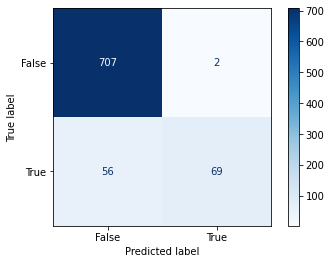

In [35]:
#visualize cfm
plot_confusion_matrix(Pipeline_dt, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

Model has good accuracy and at 0.93, but poor recall at 0.55. In fact, the model the model predicted 56 Churners incorrectly (false negative). Tuning parameters may improve model performance.

In [36]:
#build KNN pipeline
Pipeline_KN = Pipeline([('ss', StandardScaler()),
                ('KNN', KNeighborsClassifier(weights='distance'))])

In [37]:
#fit KNN
Pipeline_KN.fit(X_train, y_train)
Pipeline_KN.score(X_test, y_test)

0.854916067146283

In [38]:
#predict on test data
yhateTr_KN = Pipeline_KN.predict(X_train)
yhatTe_KN = Pipeline_KN.predict(X_test)

In [39]:
print(classification_report(y_test, yhatTe_KN))

              precision    recall  f1-score   support

       False       0.86      0.99      0.92       709
        True       0.60      0.10      0.17       125

    accuracy                           0.85       834
   macro avg       0.73      0.54      0.54       834
weighted avg       0.82      0.85      0.81       834



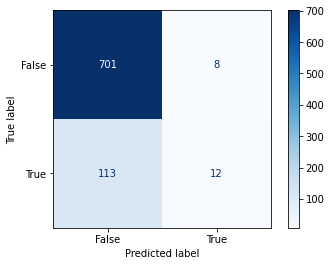

In [40]:
#visualize cfm
plot_confusion_matrix(Pipeline_KN, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [41]:
#print score metrics
print('Training Precision: ', precision_score(y_train, yhateTr_KN))
print('Testing Precision: ', precision_score(y_test, yhatTe_KN))
print('\n\n')

print('Training Recall: ', recall_score(y_train, yhateTr_KN))
print('Testing Recall: ', recall_score(y_test, yhatTe_KN))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, yhateTr_KN))
print('Testing Accuracy: ', accuracy_score(y_test, yhatTe_KN))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, yhateTr_KN))
print('Testing F1-Score: ', f1_score(y_test, yhatTe_KN))

Training Precision:  1.0
Testing Precision:  0.6



Training Recall:  1.0
Testing Recall:  0.096



Training Accuracy:  1.0
Testing Accuracy:  0.854916067146283



Training F1-Score:  1.0
Testing F1-Score:  0.16551724137931034


KNN model has accuracy of 0.85 with very low recall of 0.10. This model is not a good fit for our business priorities of maximizing accuracy and recall.

In [42]:
from xgboost import XGBClassifier

In [43]:
#build XGBoost pipeline
Pipeline_XGB = Pipeline([('ss', StandardScaler()),
                ('XGB', XGBClassifier(scale_pos_weight=100))])

In [44]:
#fit model
Pipeline_XGB.fit(X_train, y_train)
yhatTr_XGB = Pipeline_XGB.predict(X_train)
yhatTe_XGB = Pipeline_XGB.predict(X_test)

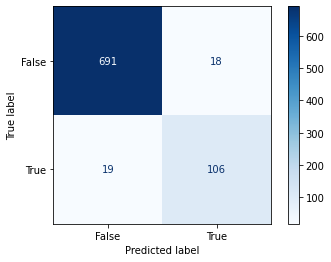

In [45]:
#visualize cfm
plot_confusion_matrix(Pipeline_XGB, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [46]:
#print score metrics
print('Training Precision: ', precision_score(y_train, yhatTr_XGB))
print('Testing Precision: ', precision_score(y_test, yhatTe_XGB))
print('\n\n')

print('Training Recall: ', recall_score(y_train, yhatTr_XGB))
print('Testing Recall: ', recall_score(y_test, yhatTe_XGB))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, yhatTr_XGB))
print('Testing Accuracy: ', accuracy_score(y_test, yhatTe_XGB))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, yhatTr_XGB))
print('Testing F1-Score: ', f1_score(y_test, yhatTe_XGB))

Training Precision:  1.0
Testing Precision:  0.8548387096774194



Training Recall:  1.0
Testing Recall:  0.848



Training Accuracy:  1.0
Testing Accuracy:  0.9556354916067147



Training F1-Score:  1.0
Testing F1-Score:  0.8514056224899599


In [47]:
print(classification_report(y_test, yhatTe_XGB))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       709
        True       0.85      0.85      0.85       125

    accuracy                           0.96       834
   macro avg       0.91      0.91      0.91       834
weighted avg       0.96      0.96      0.96       834



Model has accuracy of 0.96, with recall of 0.85. This model fits well with our business priorities of maximizing accuracy and recall. Further tuning may yield better results

# Model Refinement

With our baseline models in place, performing grid searches on the best parameters should optimally lead to better models. Here, we will choose our top performing baseline models: XGBoostClassifier, LogisticRegression DecisionForestClassifier

First, removing highly correlated independent variables to reduce multicollinearity may improve model performance.
<br>
From our correlation heatmap above, we can see a few perfectly correlated independent variables:
<br>

1. Total day charge and total day minutes
2. Total evening charge and total evening minutes
3. Total night minutes and total night charge
4. Total international minutes and total international charge

In [48]:
#drop redundant columns
refined_df = dummy_df.drop(columns=['total eve minutes', 'total day minutes',
                                    'total night minutes', 'total intl minutes'], axis=1)

refined_df.head()

,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,x0_DE,x0_FL,...,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,113,28.34,122,12.61,121,8.41,3,2.73,3,False


In [49]:
#look at parameters 
Pipeline_dt.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ss', 'dt', 'ss__copy', 'ss__with_mean', 'ss__with_std', 'dt__bootstrap', 'dt__ccp_alpha', 'dt__class_weight', 'dt__criterion', 'dt__max_depth', 'dt__max_features', 'dt__max_leaf_nodes', 'dt__max_samples', 'dt__min_impurity_decrease', 'dt__min_impurity_split', 'dt__min_samples_leaf', 'dt__min_samples_split', 'dt__min_weight_fraction_leaf', 'dt__n_estimators', 'dt__n_jobs', 'dt__oob_score', 'dt__random_state', 'dt__verbose', 'dt__warm_start'])

In [50]:
Pipeline_logreg.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()),
  ('log_reg', LogisticRegression(class_weight='balanced'))],
 'verbose': False,
 'ss': StandardScaler(),
 'log_reg': LogisticRegression(class_weight='balanced'),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'log_reg__C': 1.0,
 'log_reg__class_weight': 'balanced',
 'log_reg__dual': False,
 'log_reg__fit_intercept': True,
 'log_reg__intercept_scaling': 1,
 'log_reg__l1_ratio': None,
 'log_reg__max_iter': 100,
 'log_reg__multi_class': 'auto',
 'log_reg__n_jobs': None,
 'log_reg__penalty': 'l2',
 'log_reg__random_state': None,
 'log_reg__solver': 'lbfgs',
 'log_reg__tol': 0.0001,
 'log_reg__verbose': 0,
 'log_reg__warm_start': False}

In [51]:
Pipeline_XGB.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()),
  ('XGB',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                 importance_type='gain', interaction_constraints='',
                 learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                 min_child_weight=1, missing=nan, monotone_constraints='()',
                 n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=100, subsample=1,
                 tree_method='exact', validate_parameters=1, verbosity=None))],
 'verbose': False,
 'ss': StandardScaler(),
 'XGB': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, ma

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:

grid_dt = {'dt__criterion': ['gini', 'entropy'],
                 'dt__max_depth': [None, 2, 4, 6],
                 'dt__min_samples_split': [2,5,10],
                 'dt__min_samples_leaf': [1,2,3,4]
}
#Grid for hyperparameter tuning: decision forest

In [54]:
#perform gridsearch with grid
gridsearch = GridSearchCV(estimator=Pipeline_dt,
                         param_grid=grid_dt,
                          refit='recall',
                         scoring=['accuracy', 'recall'],
                          cv=3)

In [55]:
#fit on training data
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('dt',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=123))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 2, 4, 6],
                         'dt__min_samples_leaf': [1, 2, 3, 4],
                         'dt__min_samples_split': [2, 5, 10]},
             refit='recall', scoring=['accuracy', 'recall'])

In [56]:
#best parameters from gridsearch
gridsearch.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 4,
 'dt__min_samples_leaf': 2,
 'dt__min_samples_split': 5}

In [57]:
final_dt = Pipeline([('ss', StandardScaler()),
                     ('dt', RandomForestClassifier(random_state=123,
                                                    class_weight='balanced',
                                                   criterion='entropy',
                                                   max_depth=4,
                                                   min_samples_leaf=2,
                                                   min_samples_split=5))])
#New model with best params

In [58]:
#fit best model
final_dt.fit(X_train, y_train)
yhatFinalTe_dt = final_dt.predict(X_test)
yhatFinalTr_dt = final_dt.predict(X_train)

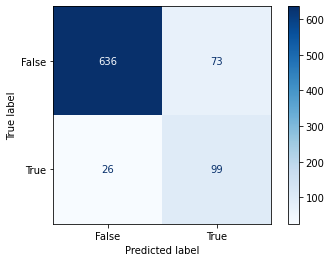

In [59]:
#visualize cfm
plot_confusion_matrix(final_dt, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [60]:
#print scoring metrics
print('Training Precision: ', precision_score(y_train, yhatFinalTr_dt))
print('Testing Precision: ', precision_score(y_test, yhatFinalTe_dt))
print('\n\n')

print('Training Recall: ', recall_score(y_train, yhatFinalTr_dt))
print('Testing Recall: ', recall_score(y_test, yhatFinalTe_dt))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, yhatFinalTr_dt))
print('Testing Accuracy: ', accuracy_score(y_test, yhatFinalTe_dt))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, yhatFinalTr_dt))
print('Testing F1-Score: ', f1_score(y_test, yhatFinalTe_dt))

Training Precision:  0.5914634146341463
Testing Precision:  0.5755813953488372



Training Recall:  0.8128491620111732
Testing Recall:  0.792



Training Accuracy:  0.8927571028411364
Testing Accuracy:  0.8812949640287769



Training F1-Score:  0.6847058823529412
Testing F1-Score:  0.6666666666666667


In [61]:
print(classification_report(y_test, yhatFinalTe_dt))

              precision    recall  f1-score   support

       False       0.96      0.90      0.93       709
        True       0.58      0.79      0.67       125

    accuracy                           0.88       834
   macro avg       0.77      0.84      0.80       834
weighted avg       0.90      0.88      0.89       834



In [62]:
grid_logreg = {'log_reg__penalty': ['l2'],
              'log_reg__C': [1, 5, 10],
              'log_reg__solver': ['lbfgs', 'liblinear']
}
#grid for logistic regression hyperparameters

In [63]:
#perform gridsearch with logreg grid
gridsearch_logreg = GridSearchCV(estimator=Pipeline_logreg,
                                param_grid=grid_logreg,
                                 refit='recall',
                                scoring=['accuracy', 'recall'],
                                cv=3)

In [64]:
#fit on training
gridsearch_logreg.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid={'log_reg__C': [1, 5, 10], 'log_reg__penalty': ['l2'],
                         'log_reg__solver': ['lbfgs', 'liblinear']},
             refit='recall', scoring=['accuracy', 'recall'])

In [65]:
gridsearch_logreg.best_params_

{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'log_reg__solver': 'lbfgs'}

In [66]:
final_log_reg = Pipeline([('ss', StandardScaler()),
                  ('log_reg', LogisticRegression(class_weight='balanced',
                                                C=1,
                                                penalty='l2',
                                                solver='lbfgs'))])
#Build log_reg with best params

In [67]:
final_log_reg.fit(X_train, y_train)
yhatFinaltr_logreg = final_log_reg.predict(X_train)
yhatFinalte_logreg = final_log_reg.predict(X_test)

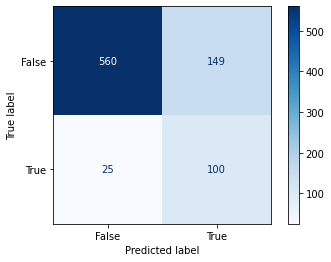

In [68]:
#visualize cfm
plot_confusion_matrix(final_log_reg, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [69]:
#print scoring metrics
print('Training Precision: ', precision_score(y_train, yhatFinaltr_logreg))
print('Testing Precision: ', precision_score(y_test, yhatFinalte_logreg))
print('\n\n')

print('Training Recall: ', recall_score(y_train, yhatFinaltr_logreg))
print('Testing Recall: ', recall_score(y_test, yhatFinalte_logreg))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, yhatFinaltr_logreg))
print('Testing Accuracy: ', accuracy_score(y_test, yhatFinalte_logreg))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, yhatFinaltr_logreg))
print('Testing F1-Score: ', f1_score(y_test, yhatFinalte_logreg))

Training Precision:  0.36863270777479895
Testing Precision:  0.40160642570281124



Training Recall:  0.7681564245810056
Testing Recall:  0.8



Training Accuracy:  0.7783113245298119
Testing Accuracy:  0.7913669064748201



Training F1-Score:  0.49818840579710144
Testing F1-Score:  0.5347593582887701


No improvement over baseline logistic regression. Same results with best parameters.

In [70]:

grid_XGB = {'XGB__learning_rate': [0.1, 0.3, 0.4],
           'XGB__max_depth': [4,5,6],
           'XGB__min_child_weight': [0,1,2,3],
           }
#grid for XGBoost

In [71]:
#perform gridsearch 
gridsearch_XGB = GridSearchCV(estimator=Pipeline_XGB,
                             param_grid=grid_XGB,
                              refit='recall',
                             scoring=['recall', 'accuracy'],
                             cv=3)

In [72]:
gridsearch_XGB.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('XGB',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.300000012,
                                                      max_delta_step=0,
                                                      max_depth=6,
                                                  

In [73]:
#show best parameters
gridsearch_XGB.best_params_

{'XGB__learning_rate': 0.1, 'XGB__max_depth': 4, 'XGB__min_child_weight': 3}

In [74]:
final_XGB = Pipeline([('ss', StandardScaler()),
                      ('XGB', XGBClassifier(scale_pos_weight=100,
                                           learning_rate=0.1,
                                           max_depth=4,
                                           min_child_weight=3))])
#Build XGBoost with best params

In [75]:
final_XGB.fit(X_train, y_train)
yhatFinaltr_XGB = final_XGB.predict(X_train)
yhatFinalte_XGB = final_XGB.predict(X_test)

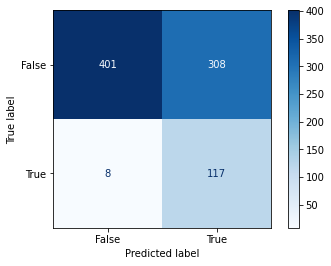

In [76]:
#visualize cfm
plot_confusion_matrix(final_XGB, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [77]:
##print scoring metrics
print('Training Precision: ', precision_score(y_train, yhatFinaltr_XGB))
print('Testing Precision: ', precision_score(y_test, yhatFinalte_XGB))
print('\n\n')

print('Training Recall: ', recall_score(y_train, yhatFinaltr_XGB))
print('Testing Recall: ', recall_score(y_test, yhatFinalte_XGB))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, yhatFinaltr_XGB))
print('Testing Accuracy: ', accuracy_score(y_test, yhatFinalte_XGB))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, yhatFinaltr_XGB))
print('Testing F1-Score: ', f1_score(y_test, yhatFinalte_XGB))

Training Precision:  0.296849087893864
Testing Precision:  0.2752941176470588



Training Recall:  1.0
Testing Recall:  0.936



Training Accuracy:  0.6606642657062826
Testing Accuracy:  0.6211031175059952



Training F1-Score:  0.45780051150895135
Testing F1-Score:  0.4254545454545454


In [78]:
print(classification_report(y_test, yhatFinalte_XGB))

              precision    recall  f1-score   support

       False       0.98      0.57      0.72       709
        True       0.28      0.94      0.43       125

    accuracy                           0.62       834
   macro avg       0.63      0.75      0.57       834
weighted avg       0.87      0.62      0.67       834



In our tuned XGBoost model optimized for recall, we achieve a recall of 0.936. However, this comes with a tradeoff of significantly worse precision. In fact, the model predicted 308 false positives compared to the 18 false positives from our baseline. 

In [79]:
#show feature importances
print(gridsearch_XGB.best_estimator_.named_steps["XGB"].feature_importances_)

[0.02412736 0.0272784  0.         0.         0.         0.
 0.0194237  0.02655745 0.01032642 0.         0.         0.03097034
 0.01762773 0.         0.0229903  0.         0.         0.01477361
 0.         0.04212297 0.         0.         0.         0.
 0.02751222 0.         0.01810217 0.         0.03427292 0.
 0.01941787 0.         0.         0.         0.01099755 0.
 0.01784636 0.03338262 0.         0.         0.         0.
 0.02293034 0.         0.         0.         0.03397689 0.
 0.         0.03736805 0.         0.02034118 0.0009184  0.
 0.08474375 0.         0.01495327 0.         0.03928704 0.02597501
 0.0300138  0.03130016 0.         0.01908398 0.02996163 0.
 0.03984706 0.03147228 0.         0.03989538 0.02510065 0.
 0.07510111]


In [80]:
orig_feature_names = X.columns

<AxesSubplot:>

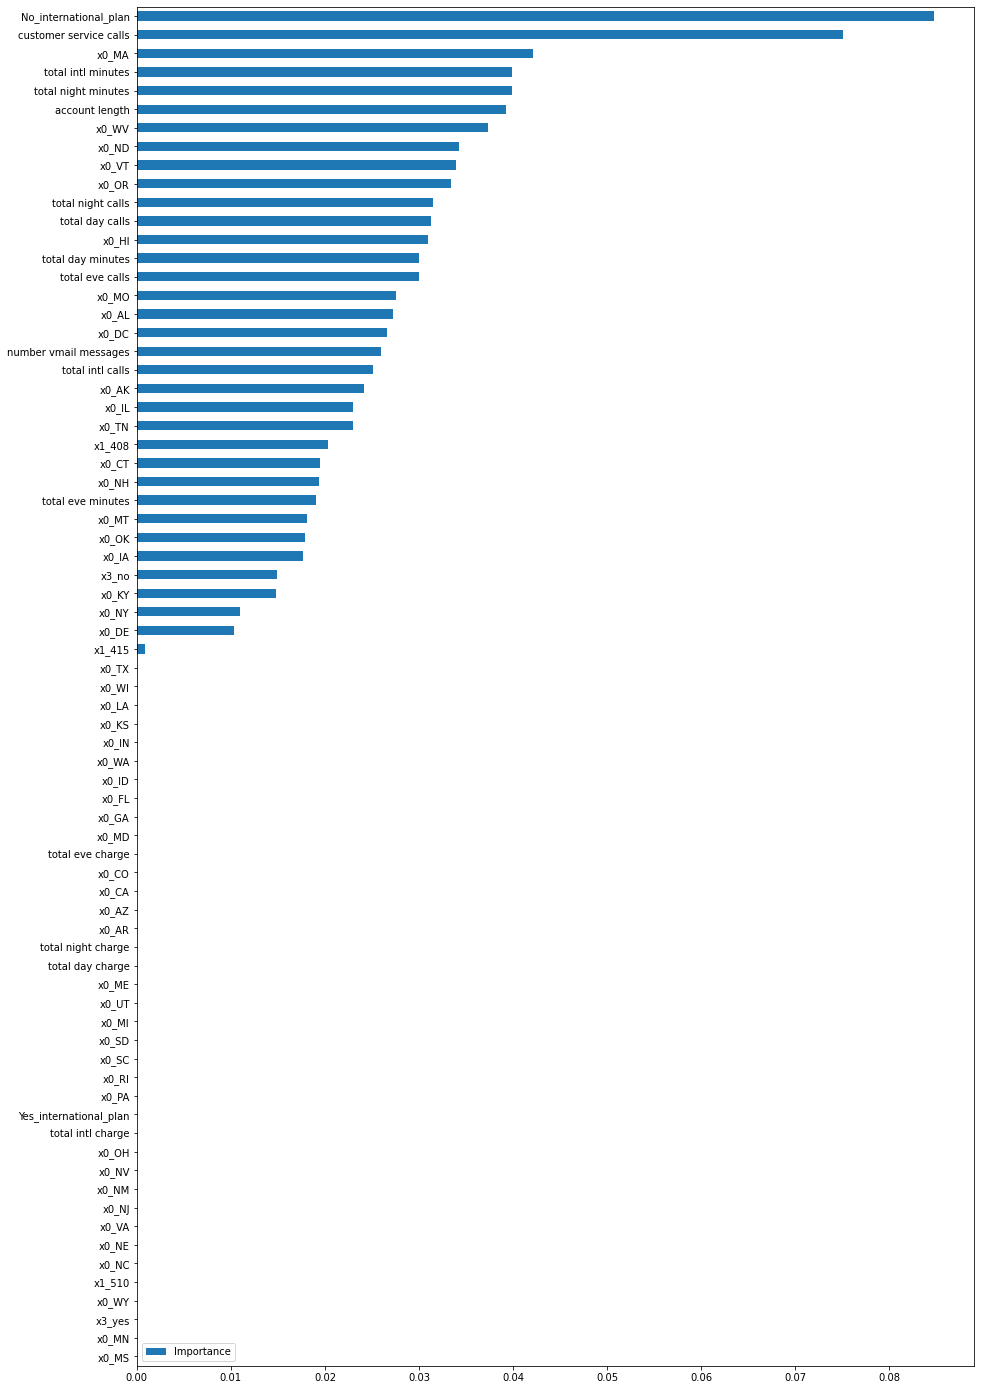

In [81]:
feature_importances = gridsearch_XGB.best_estimator_.named_steps["XGB"].feature_importances_
pd.DataFrame(feature_importances, index=orig_feature_names,
                     columns=['Importance']).sort_values('Importance') \
            .plot(kind='barh', figsize=(15, 25))
#Plot feature importances with column names

Overall, xgboost produced the best recall compared to the other models, missing only 8 churners (false negatives). Even though the xgboost model produced significantly more false positives, this error is not detrimental to the business. Misclassifying non-churners is not a material issue, while misclassifying churners materially hurts the business if those customers leave the service.

# Business Recommendation 

Our best performing model, XGBoost, identified the following features as most important to predicting churn:
<br>
1. Not having an international plan
<br>
2. Number of customer service calls
<br>
3. Being a MA customer
<br>

In accordance with these features I recommend the following business recommendations:
<br>

A tailored, automated email flow addressing common pain points to customers with more than 2 customer service calls. The goal of this email campaign is to assuage the most common concerns that customers have so that the likelihood of churn decreases.
<br>

A comprehensive investigation of the MA market. First, customers in MA should be sent a survey assessing their level of satisfaction with the service, as well as assessing their pain points and complaints. These survey results should be analyzed to find why MA customers are more likely to churn.
<br>

A renewed focus on customers in the international plan segment. Customers with the international plan are less likely to churn. Therefore, I recommend targeting this customer segment with a new marketing campaign designed to bring these higher life time value customers into our network. This should help the company drive revenue growth with better quality customers who spend more and churn less. 


# Limitations

<br>

Our final algorithm optimized for recall produces false positives at a higher rate than the baseline. This is not a problem for meeting our business goals. However, the false positives may produce inefficiencies at scale, since the model may produce many false positives when used on large data sets. 
<br>

Problems may include wasted marketing communications and customer annoyance.